# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [6]:
dataset.shape

(10000, 10)

In [4]:
dataset.isnull().sum()

Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64

## Implementing UCB

In [14]:
import math
N=10000
d=10
ads_selected=[]
number_of_times=[0,0,0,0,0,0,0,0,0,0]
sums_of_rewards=[0]*10
total_reward=0
for n in range(0,N):
  ads=0
  max_upper_bound=0
  for i in range(0,d):
     if (number_of_times[i] > 0):
      average_reward = sums_of_rewards[i] / number_of_times[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_times[i])
      upper_bound = average_reward + delta_i
     else:
      upper_bound = 1e400
     if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  number_of_times[ad] = number_of_times[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward


## Visualising the results

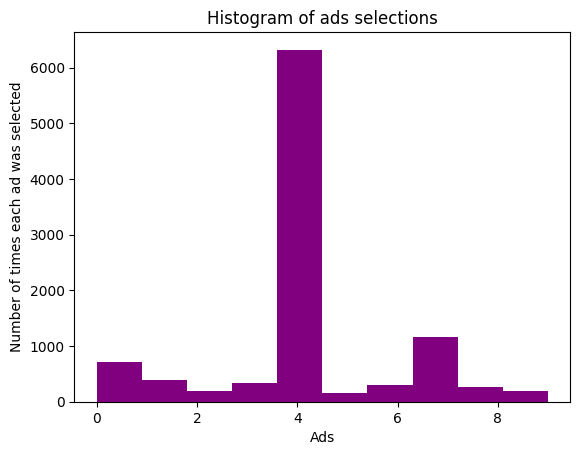

In [17]:
plt.hist(ads_selected,color='purple')
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()